In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Polygon
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [70]:
rm = pd.read_csv("/content/all_perth_310121.csv")
rm.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN


In [71]:
rm.describe()

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK
count,3.365600e+04,33656.000000,33656.000000,31178.000000,33656.000000,33656.000000,30501.000000,33656.000000,33656.000000,33656.000000,33656.000000,33656.000000,33656.000000,22704.000000
mean,6.370720e+05,3.659110,1.823063,2.199917,2740.644016,183.501545,1989.706436,19777.374465,4523.371494,6089.420074,-31.960664,115.879265,1.815268,72.672569
std,3.558256e+05,0.752038,0.587427,1.365225,16693.513215,72.102982,20.964330,11364.415413,4495.064024,62.167921,0.177780,0.118137,1.746000,40.639795
min,5.100000e+04,1.000000,1.000000,1.000000,61.000000,1.000000,1868.000000,681.000000,46.000000,6003.000000,-32.472979,115.582730,0.070912,1.000000
25%,4.100000e+05,3.000000,1.000000,2.000000,503.000000,130.000000,1978.000000,11200.000000,1800.000000,6050.000000,-32.068437,115.789763,0.880568,39.000000
50%,5.355000e+05,4.000000,2.000000,2.000000,682.000000,172.000000,1995.000000,17500.000000,3200.000000,6069.000000,-31.933231,115.854198,1.345520,68.000000
75%,7.600000e+05,4.000000,2.000000,2.000000,838.000000,222.250000,2005.000000,26600.000000,5300.000000,6150.000000,-31.843818,115.970722,2.097225,105.000000
max,2.440000e+06,10.000000,16.000000,99.000000,999999.000000,870.000000,2017.000000,59800.000000,35500.000000,6558.000000,-31.457450,116.343201,23.254372,139.000000


In [73]:
rm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33656 entries, 0 to 33655
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ADDRESS           33656 non-null  object 
 1   SUBURB            33656 non-null  object 
 2   PRICE             33656 non-null  int64  
 3   BEDROOMS          33656 non-null  int64  
 4   BATHROOMS         33656 non-null  int64  
 5   GARAGE            31178 non-null  float64
 6   LAND_AREA         33656 non-null  int64  
 7   FLOOR_AREA        33656 non-null  int64  
 8   BUILD_YEAR        30501 non-null  float64
 9   CBD_DIST          33656 non-null  int64  
 10  NEAREST_STN       33656 non-null  object 
 11  NEAREST_STN_DIST  33656 non-null  int64  
 12  DATE_SOLD         33656 non-null  object 
 13  POSTCODE          33656 non-null  int64  
 14  LATITUDE          33656 non-null  float64
 15  LONGITUDE         33656 non-null  float64
 16  NEAREST_SCH       33656 non-null  object

In [77]:
rm.isnull().sum()

,0
ADDRESS,0
SUBURB,0
PRICE,0
BEDROOMS,0
BATHROOMS,0
GARAGE,0
LAND_AREA,0
FLOOR_AREA,0
BUILD_YEAR,0
CBD_DIST,0


In [79]:
rm = rm.dropna()

In [78]:
rm.duplicated().sum()

0

In [80]:
rm

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
9,1 Arundel Street,Bayswater,685000,3,2,8.0,552,126,1999.0,5900,Bayswater Station,508,10-2019\r,6053,-31.917880,115.907050,CHISHOLM CATHOLIC COLLEGE,0.936243,29.0
11,1 Ashcott Gate,Butler,367500,3,2,2.0,398,158,2003.0,36300,Butler Station,2100,11-2018\r,6036,-31.654280,115.702200,BUTLER COLLEGE,0.680843,39.0
13,1 Ashendon Boulevard,Hammond Park,535000,4,2,4.0,704,247,2002.0,23100,Cockburn Central Station,3900,07-2019\r,6164,-32.159590,115.849480,ATWELL COLLEGE,2.220643,129.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33646,9B North Street,Swanbourne,1700000,4,3,4.0,414,277,2009.0,9400,Grant Street Station,558,04-2017\r,6010,-31.981771,115.765149,SCOTCH COLLEGE,0.762346,24.0
33648,9B Teocote Crescent,Aubin Grove,423000,3,2,2.0,248,108,2011.0,24900,Cockburn Central Station,5700,05-2016\r,6164,-32.176013,115.858357,ATWELL COLLEGE,3.607062,129.0
33649,9B Viveash Road,Middle Swan,467000,4,2,2.0,400,132,2014.0,17100,Midland Station,2500,04-2015\r,6056,-31.872192,116.013543,LA SALLE COLLEGE,1.116806,53.0
33650,9b Wesley Street,South Fremantle,955000,3,2,1.0,200,127,1997.0,16000,Fremantle Station,1900,02-2019\r,6162,-32.066410,115.756070,FREMANTLE COLLEGE,1.134956,128.0


<Axes: xlabel='PRICE', ylabel='LAND_AREA'>

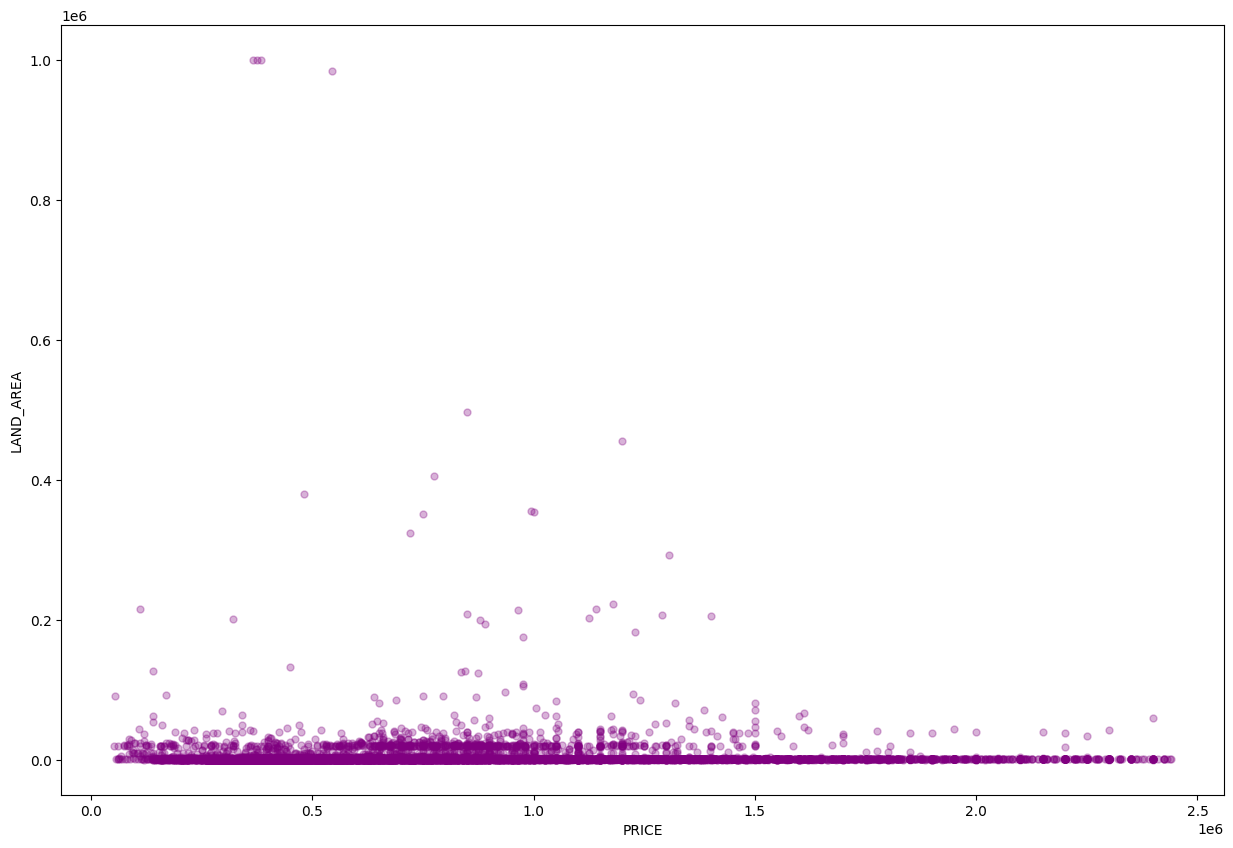

In [83]:
rm.plot(kind='scatter', x='PRICE', y='LAND_AREA', s=25, alpha=0.3, color='purple', figsize=(15, 10))

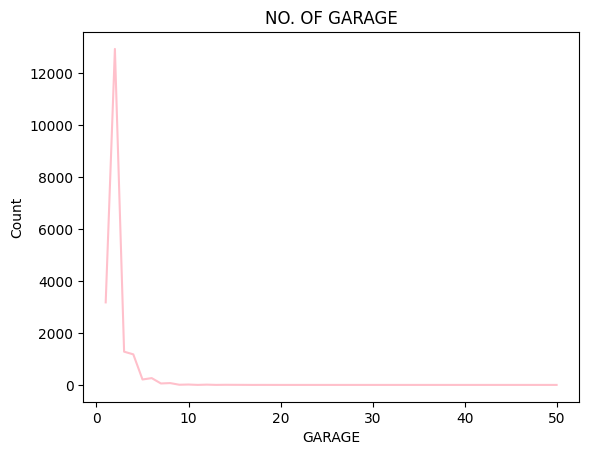

In [86]:
GARAGE = rm['GARAGE'].value_counts()
GARAGE_count_sorted = GARAGE.sort_index()
GARAGE_count_sorted.plot(kind='line', color='pink')
plt.title('NO. OF GARAGE')
plt.xlabel('GARAGE')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

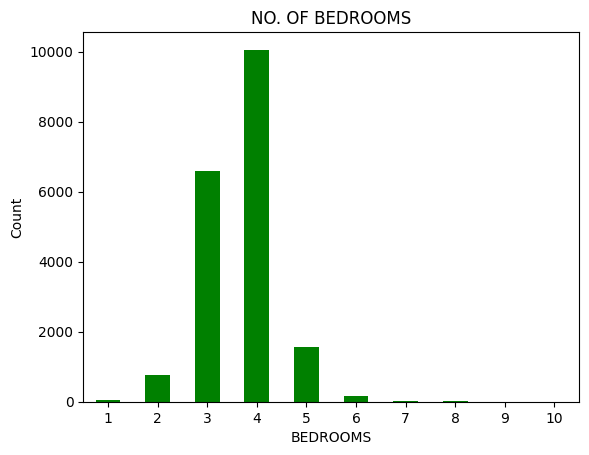

In [87]:
BEDROOMS=count = rm['BEDROOMS'].value_counts()
BEDROOMS_count_sorted = BEDROOMS.sort_index()
BEDROOMS_count_sorted.plot(kind='bar', color='green')
plt.title('NO. OF BEDROOMS')
plt.xlabel('BEDROOMS')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

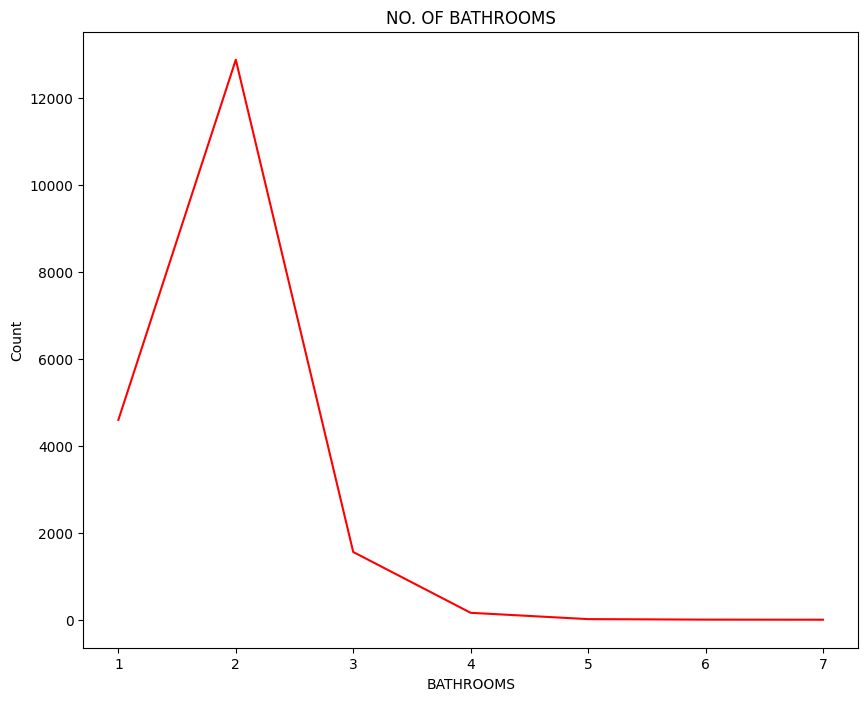

In [88]:
BATHROOMS=count = rm['BATHROOMS'].value_counts()
BATHROOMS_count_sorted = BATHROOMS.sort_index()
BATHROOMS_count_sorted.plot(kind='line',color='red', figsize=(10, 8))
plt.title('NO. OF BATHROOMS')
plt.xlabel('BATHROOMS')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

<Axes: xlabel='FLOOR_AREA', ylabel='LAND_AREA'>

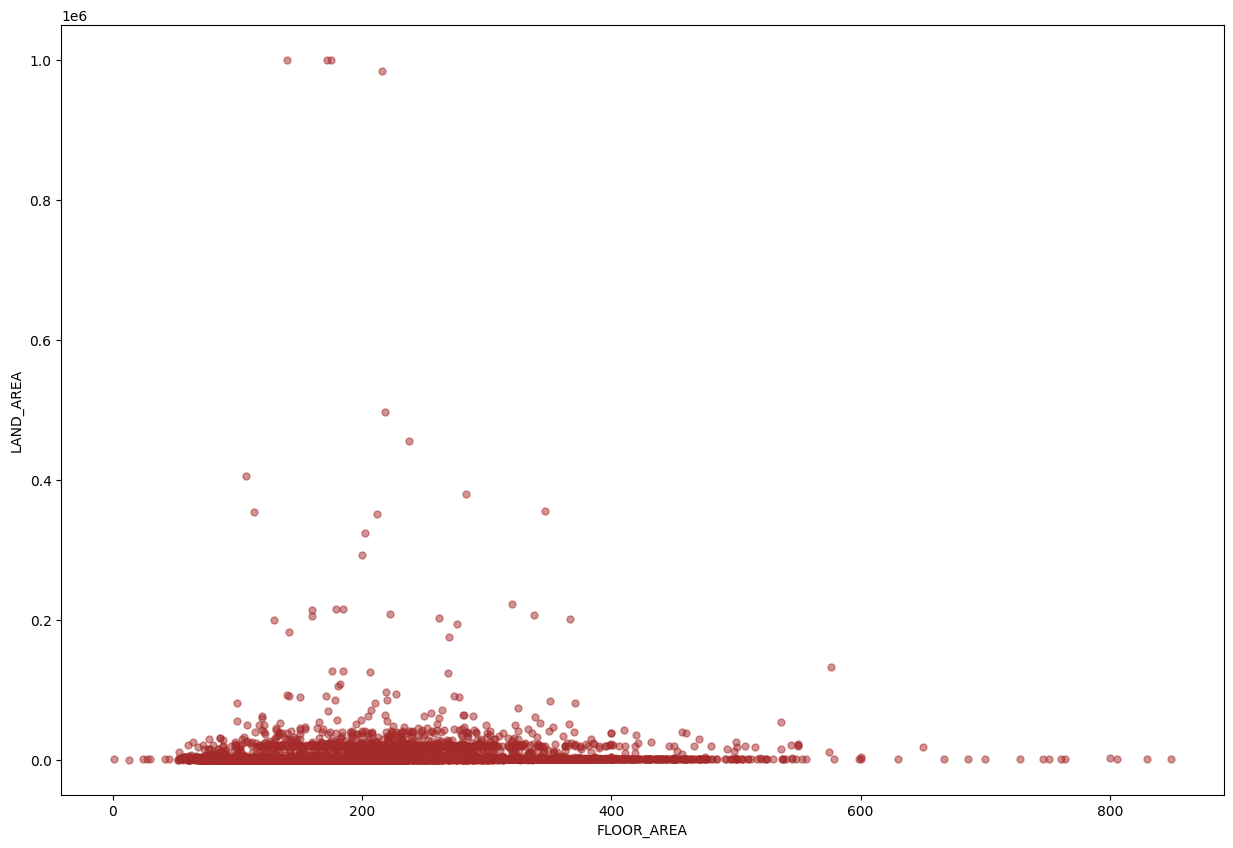

In [92]:
rm.plot(kind='scatter', x='FLOOR_AREA', y='LAND_AREA', s=25, alpha=0.5, color='BROWN', figsize=(15, 10))

In [ ]:
encoder=LabelEncoder()




In [96]:
encoding_columns = ['ADDRESS', 'SUBURB', 'NEAREST_STN',	'NEAREST_SCH']
for col in encoding_columns:
    rm[col] = encoder.fit_transform(rm[col])

In [97]:
rm

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
1,0,252,365000,3,2,2.0,351,139,2013.0,26900,35,4900,02-2019\r,6167,-32.193470,115.859554,5,5.524324,129.0
2,1,44,287000,3,1,1.0,719,86,1979.0,22600,12,1900,06-2015\r,6111,-32.120578,115.993579,51,1.649178,113.0
9,2,21,685000,3,2,8.0,552,126,1999.0,5900,3,508,10-2019\r,6053,-31.917880,115.907050,19,0.936243,29.0
11,3,41,367500,3,2,2.0,398,158,2003.0,36300,8,2100,11-2018\r,6036,-31.654280,115.702200,12,0.680843,39.0
13,4,106,535000,4,2,4.0,704,247,2002.0,23100,17,3900,07-2019\r,6164,-32.159590,115.849480,5,2.220643,129.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33646,19171,241,1700000,4,3,4.0,414,277,2009.0,9400,28,558,04-2017\r,6010,-31.981771,115.765149,88,0.762346,24.0
33648,19172,10,423000,3,2,2.0,248,108,2011.0,24900,17,5700,05-2016\r,6164,-32.176013,115.858357,5,3.607062,129.0
33649,19173,170,467000,4,2,2.0,400,132,2014.0,17100,43,2500,04-2015\r,6056,-31.872192,116.013543,56,1.116806,53.0
33650,19177,231,955000,3,2,1.0,200,127,1997.0,16000,25,1900,02-2019\r,6162,-32.066410,115.756070,32,1.134956,128.0


In [110]:

rm = rm.drop(columns=[ 'DATE_SOLD'], axis=1)

In [113]:
x=rm.drop(columns=['PRICE'],axis=1)
y=rm['PRICE']

In [114]:
print(x.dtypes)

ADDRESS               int64
SUBURB                int64
BEDROOMS              int64
BATHROOMS             int64
GARAGE              float64
LAND_AREA             int64
FLOOR_AREA            int64
BUILD_YEAR          float64
CBD_DIST              int64
NEAREST_STN           int64
NEAREST_STN_DIST      int64
LATITUDE            float64
LONGITUDE           float64
NEAREST_SCH           int64
NEAREST_SCH_DIST    float64
NEAREST_SCH_RANK    float64
dtype: object


In [115]:
scaler = MinMaxScaler()
x = scaler.fit_transform (x)
y = scaler.fit_transform(y.values.reshape(-1, 1))

In [116]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [117]:
in_model = LinearRegression()
in_model.fit(x_train, y_train)

LinearRegression()

In [118]:
y_pred = in_model.predict(x_test)


In [119]:
 mae = mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


In [120]:
mse

0.009310457358602711

In [121]:
mae

0.009310457358602711

In [122]:
in_acc = r2_score(y_test, y_pred)
in_acc

0.6246847600753034